<h1>
    <br style ="font-family:UCL-SoM-Outline;color:#EA7600"> GROUP COURSEWORK </br> 
    </p>
</h1>

<div class="image">

<img src="./figures/som_ft.png" width="70%"  align="right">
<h4>
          <p style="font-size:18pt">MSIN0097 Predictive Analytics</p>
          <p style="font-size:18pt;font-family:UCL-SoM-Solid; color:#EA7600;">Group Name: <u>18</u> </p> 


</h4>

</div>

<br>
<br>
<br>


# COURSEWORK: WARNER MUSIC



### PREDICTING THE SUCCESS OF ARTISTS ON SPOTIFY

Please complete the sections of this Notebook with supporting code and markup analysis where appropriate. During this coursework you will:

- Understand the specific business forecast task 
- Prepare a dataset, clean and impute where necessary 
- Train an ensemble classifier 
- Evaluate the performance and comment of success and failure modes
- Complete all necessary stages of the data science process 




There should be around 100 words per ACTION cell, but use the wordcount over the duration of the Notebook at your discretion. 

* **Please use the below green cell, when writing your comments in markup.**
* **Please feel free to add extra code cells in the notebook if needed.**

<div class="alert alert-success">
<b> Title </b> (Optional)

<p>Content</p> 

</div>

## 0. Business Case Understanding

### INTRODUCTION
In recent times, digital streaming has been prepotent and dominant in the streaming media market and the music industry. The prevalence of digital streaming generates an enormous amount of data on artists, and more importantly the music preferences of users. Consequently, leading firms in the industry begin to pivot strategically and implement a data-driven approach for content delivery and withstand in the fiercely competitive market. 

Warner Music Group (WMG) intends to thoroughly understand the primary causes of the success of a new artist. Relevant outcomes will help propel the optimization of resources allocated to contract agreements and promotions of new artists. 

### Streaming Music

When artists release music digitally, details of how their music is streamed can be closely monitored. 

Some of these details include:

- How listeners found their music (a recommendation, a playlist)
- Where and when (a routine visit to the gym, a party, while working). 
- On what device (mobile / PC)
- And so on…

Spotify alone *process nearly 1 billion streams every day* (Dredge, 2015) and this streaming data is documented in detail every time a user accesses the platform. 

Analyzing this data potentially enables us to gain a much deeper insight into customers’ listening behavior and individual tastes. 

Spotify uses it to drive their recommender systems – these tailor and individualize content as well as helping the artists reach wider and more relevant audiences. 

Warner Music would like to use it to better understand the factors that influence the *future success of its artists*, *identify potentially successful acts* early on in their careers and use this analysis to make resource decisions about how they market and support their artists.

### What are Spotify Playlists and why are relevant today?

A playlist is a group of tracks that you can save under a name, listen to, and update at your leisure. 


<img src = 'figures/spotify_playlist_image.png' width="50%"  align="left">

**Figure 1. Screen shot of Spotify product show artists and playlists.**

Spotify currently has more than two billion publicly available playlists, many of which are curated by Spotify’s in-house team of editors. 

The editors scour the web on a daily basis to remain up-to-date with the newest releases, and to create playlists geared towards different desires and needs. 

Additionally, there are playlists such as [Discover Weekly](https://www.spotify.com/uk/discoverweekly/) and [Release Radar](https://support.spotify.com/uk/using_spotify/playlists/release-radar/) that use self-learning algorithms to study a user’s listening behavior over time and recommend songs tailored to his/her tastes.
	
The figure below illustrates the progression of artists on Spotify Playlists:

<img src = 'figures/playlist_heirarchy.png' width="80%"  align="left">

**Figure 2. Figure to illustarte selecting artists and building audience profiles over progressively larger audiences of different playlists. **

The artist pool starts off very dense at the bottom, as new artists are picked up on the smaller playlists, and thins on the way to the top, as only the most promising of them make it through to more selective playlists. The playlists on the very top contain the most successful, chart-topping artists.

An important discovery that has been made is that certain playlists have more of an influence on the popularity, stream count and future success of an artist than others. 

<img src = 'figures/playlist_lift.png' width="80%"  align="left">

** Figure 3. Figure to illustrate taking song stream data and using it to predict the trajectory, and likely success, of Warner artists. **

Moreover, some playlists have been seen to be pivotal in the careers of successful artists. Artists that do make it onto one of these *key* playlists frequently go on to become highly ranked in the music charts. 

It is the objective of Warner’s [A&R](https://en.wikipedia.org/wiki/Artists_and_repertoire) team to identify and sign artists before they achieve this level of success i.e. before they get selected for these playlists, in order to increase their ROI. 

### BUSINESS PROBLEM → DATA PROBLEM

Now that we have a better understanding of the business problem, we can begin to think about how we could model this problem using data. 

The first thing we can do is defining a criterion for measuring artist success. 

Based on our business problem, one way in which we can do this is to create a binary variable representing the success / failure of an artist and determined by whether a song ends up on a key playlist (1), or not (0). We can then generate features for that artist to determine the impact they have on the success of an artist.

Our problem thus becomes a classification task, which can be modeled as follows:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*

where,

**Success (1) = Artist Features on Key Playlist**

The key playlists we will use for this case study are the 4 listed below, as recommended by Warner Analysts:

1.	Hot Hits UK
2.	Massive Dance Hits
3.	The Indie List
4.	New Music Friday


The coursework task is to take a look at the Spotify dataset to see how we might be able to set up this classification model.

Complete the code sections below to work through the project from start to finish. 
<br>

In [3]:
# Python Project Template

# WEEK 7

# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# WEEK 8

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms (PCA, missing values, multi-collinearity, normalizing, class balance)

# WEEK 9-10

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

<div class="alert alert-warning">
<b>ACTION: Guidance </b> 

<p>If you need to do something, instructions will appear in a box like this</p> 

</div>

## 1. Prepare the problem 

Run your code on Faculty. We have prepared some of the data for you already. 

In addition, we have imported a custom module (spotfunc.py) containing useful functions written for this dataset.

In [1]:
# Preamble 
# Import basic libraries
import os
import numpy as np
import pandas as pd
# Preamble 
import random


# Import from Scikit Learn Library
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier,ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import GridSearchCV
import itertools 



import sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
# Matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import seaborn as sns

import joblib

# Display full output rather than just the last line of output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")




## 2. Data Understanding

<br>
A year’s worth of Spotify streaming data in the WMG database amounts to approximately 50 billion rows of data i.e. 50 billion streams (1.5 to 2 terabytes worth), with a total of seven years of data stored altogether (2010 till today).

For the purposes of this case study, we will be using a sample of this data. The dataset uploaded on the Faculty server is about 16GB, containing data from 2015 - 2017. Given the limits on RAM and cores, we will be taking a further sample of this data for purposes of this case study: a 10% random sample of the total dataset, saved as 'cleaned_data.csv'. 

*Note: The code for this sampling in included below, but commented out.*

We can begin with reading in the datasets we will need. We will be using 2 files: 
1. Primary Spotify dataset
2. Playlist Name Mapper (only playlist IDs provided in primary dataset)



In [5]:
# %%time

# Sampling data to read in 10% 
# sfs.get('/input/all_artists_with_date_time_detail.csv', 'client-data.csv')
# # Read in data
# # The data to load
# f = 'client-data.csv'

# # Count the lines
# num_lines = sum(1 for l in open(f))
# n = 10
# # Count the lines or use an upper bound
# num_lines = sum(1 for l in open(f))

# # The row indices to skip - make sure 0 is not included to keep the header!
# skip_idx = [x for x in range(1, num_lines) if x % n != 0]
# # Read the data
# data = pd.read_csv(f, skiprows=skip_idx )


Read in the data

In [6]:
%%time
# Read in sampled data
data = pd.read_csv('cleaned_data.csv')
print('rows:',len(data))

# Keep a copy of original data in case of changes made to dataframe
all_artists = data.copy()

# Load laylist data
playlist_ids_and_titles = pd.read_csv('playlists_ids_and_titles.csv',encoding = 'latin-1',error_bad_lines=False,warn_bad_lines=False)

# Keep only those with 22 characters (data cleaning)
playlist_mapper = playlist_ids_and_titles[playlist_ids_and_titles.id.str.len()==22].drop_duplicates(['id'])


<decorator-gen-55>:2: DtypeWarning: Columns (2,13) have mixed types.Specify dtype option on import or set low_memory=False.


rows: 3805499
Wall time: 19.5 s


Begin by taking a look at what the Spotify data looks like:

<div class="alert alert-warning">
<b>ACTION: Inspect the data </b> 

Make sure you understand the data. Use methods like **data.head()**, **data.info()**, etc.

</div>

In [7]:
## display all the columns
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN


In [8]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name'],
      dtype='object')

In [9]:
data.info

<bound method DataFrame.info of          Unnamed: 0  Unnamed: 0.1                  Unnamed: 0.1.1  day  \
0                 0             9   ('small_artists_2016.csv', 9)   10   
1                 1            19  ('small_artists_2016.csv', 19)   10   
2                 2            29  ('small_artists_2016.csv', 29)   10   
3                 3            39  ('small_artists_2016.csv', 39)   10   
4                 4            49  ('small_artists_2016.csv', 49)   10   
...             ...           ...                             ...  ...   
3805494     3805494      38054949                         1301551   10   
3805495     3805495      38054959                         1301561   10   
3805496     3805496      38054969                         1301571   10   
3805497     3805497      38054979                         1301581   10   
3805498     3805498      38054989                         1301591   10   

                  log_time  mobile                          track_id  \
0      

In [10]:
playlist_mapper.head()

,id,name
0,607qZnoGjqhpWjOaJWakmx,80er jaren
1,4xP3wJiHkHfyPcGBjsZcpf,Glee
2,1iHOfbhKGHImcrEJXhrUdg,Best of 1980s
3,08AR0IWSEfi0GCnB7b6AAW,Kesähitit/yhden hitin ihmeet/sekalaista
4,3DeVsW7nzA3qezOMowGkeu,Músicas para Transar


Each row in the data is a unique stream – every time a user streams a song in the Warner Music catalogue for at least 30 seconds it becomes a row in the database. Each stream counts as a ‘transaction’, the value of which is £0.0012, and accordingly, 1000 streams of a song count as a ‘sale’ (worth £1) for the artist. The dataset is comprised of listeners in Great Britain only.

Not all the columns provided are relevant to us. Lets take a look at some basic properties of the dataset, and identify the columns that are important for this study


The columns you should *focus* on for this case study are:

* Log Time – timestamp of each stream
* Artist Name(s) – some songs feature more than one artist
* Track Name
* ISRC - (Unique code identifier for that version of the song, i.e. radio edit, album version, remix etc.)
* Customer ID
* Birth Year
* Location of Customer
* Gender of Customer
* Stream Source URI – where on Spotify was the song played – unique playlist ID, an artist’s page, an album etc.


### EXPLORATORY ANALYSIS AND PLOTS


Now look at the data set in more detail. 

<div class="alert alert-warning">
<b>ACTION: Exploratory analysis </b> 

<p>As demonstrated in class, explore various distribution of the data. Comment on any patterns you can see.</p>

<p>- Highlight on any potential uncertainties or peculiarities that you observe. </p> 

<p>- Variables you might explore, include, but are not limited to: Age, Gender, Stream counts and playlists.</p>

<p> - Use figures, plots and visualization as necessary.</p>

</div>

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

In [12]:
# check the nan values
data.isnull().sum()

Unnamed: 0                 0
Unnamed: 0.1               0
Unnamed: 0.1.1             0
day                        0
log_time                   0
mobile                     0
track_id                   0
isrc                       4
upc                        0
artist_name                0
track_name                 0
album_name                 0
customer_id                0
postal_code          1352181
access                     0
country_code               0
gender                 40422
birth_year             10021
filename                   0
region_code           261956
referral_code        3805499
partner_name         3378646
financial_product    2329099
user_product_type      22992
offline_timestamp    3805499
stream_length              0
stream_cached        3805499
stream_source              0
stream_source_uri    2761628
stream_device              0
stream_os                  0
track_uri                  0
track_artists              0
source               3805499
DateTime      

In [13]:
# fill missing values
data['gender'].fillna(0, inplace=True)
data['birth_year'].fillna(0, inplace=True)

### Customer Age

In [14]:
# convert birth year to age and change data type to int
data['age'] = 2021 - data['birth_year']
data['age'] = data['age'].astype('int')
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,53
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,53
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,26
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,29
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,42


We find that there are some extreme values, which are not reliable data for our analysis. Therefore, we only take ages between 6 and 95 into consideration.

In [15]:
data['age'].value_counts()

24     275327
25     274611
26     265162
23     250556
27     213865
        ...  
15         12
11          6
12          4
129         2
154         1
Name: age, Length: 115, dtype: int64

In [16]:
data2 = data[(data['age']>=6)&(data['age']<=95)]
data2['age'].value_counts()

24    275327
25    274611
26    265162
23    250556
27    213865
       ...  
95        63
16        21
15        12
11         6
12         4
Name: age, Length: 84, dtype: int64

In [17]:
data['artist_name'].isnull().sum()

0

In [18]:
# Creat column age 
data.loc[:,'age'] = 2021 - data.loc[ :,'birth_year']
bins = [0, 18, 25, 50, 150]
group_names = ['Dependent', 'YoungAdult', 'Adult', 'Senior']
data['age'] = pd.cut(data['age'], bins, labels=group_names)

In [19]:
# Group by age_group of customer
age_group_count= data['age'].value_counts().reset_index().rename(columns = {"index": "age_group", "age": "number_of_stream"})
age_group_count

,age_group,number_of_stream
0,Adult,2155059
1,YoungAdult,1365219
2,Senior,250928
3,Dependent,24271


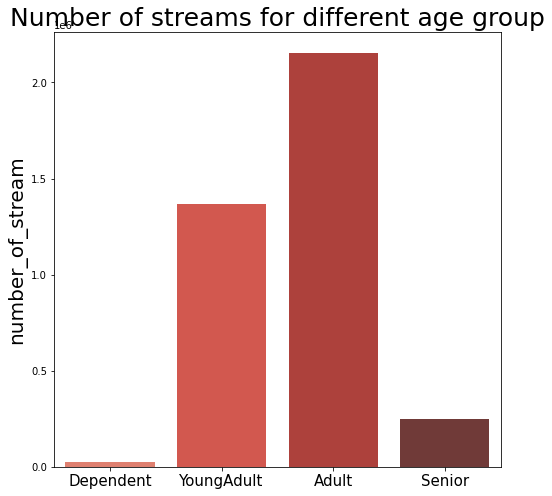

In [20]:
# Plot number of stream by age group
plt.figure(figsize= (8,8))
f2 = sns.barplot(x=age_group_count.age_group, y=age_group_count.number_of_stream,palette=("Reds_d")).set_title('Number of streams for different age group',fontsize=25)
plt.xticks(fontsize=15)
plt.xlabel('')
plt.ylabel('number_of_stream',fontsize = 20)
plt.show()

### Customer Gender

In [21]:
# count the number of males and females
data['gender'].value_counts()

female    1955719
male      1809358
0           40422
Name: gender, dtype: int64

<Figure size 432x288 with 0 Axes>

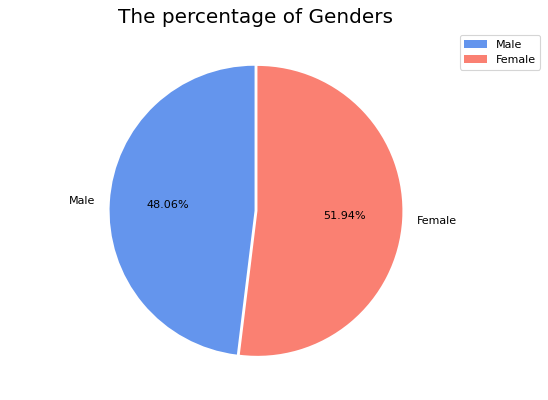

In [22]:
# The percentage of gender

no_of_gender = [1809358, 1955719]

fig = plt.figure()
plt.figure(figsize=(8,6),dpi=80)
labels = ['Male','Female']
colors = ['cornflowerblue','salmon']
explode = (0.01,0.01)
plt.axis('equal')
plt.title("The percentage of Genders",fontsize = 18)
plt.pie(no_of_gender, labels=labels, 
                      autopct='%3.2f%%',
                      explode=explode,
                      colors=colors,
                      labeldistance = 1.1,
                      startangle = 90,
                      pctdistance = 0.6)
plt.legend(bbox_to_anchor=(0.9,1))
plt.show()

### Stream Counts By Artists

In [22]:
# we can look at the artist with most streams and least streams
data['artist_name'].value_counts()

Charlie Puth         447873
Dua Lipa             315663
Lukas Graham         311271
Cheat Codes          255820
Anne-Marie           247934
                      ...  
Miguel Angel              1
Nicolas Motet             1
Frederik Leopold          1
Rebecka Karlsson          1
Jolente De Maeyer         1
Name: artist_name, Length: 661, dtype: int64

In [23]:
# calculate the mean of streams for all the artists

data['artist_name'].value_counts().mean()

5757.184568835099

In [24]:
# find the key 4 playlists by total stream counts

print(playlist_mapper.name.apply(lambda x: 1 if x=='Hot Hits UK' else 0).sum())
print(playlist_mapper.name.apply(lambda x: 1 if x=='Massive Dance Hits' else 0).sum())
print(playlist_mapper.name.apply(lambda x: 1 if x=='The Indie List' else 0).sum())
print(playlist_mapper.name.apply(lambda x: 1 if x=='New Music Friday' else 0).sum())

2
1
1
10


### Stream Date

In [25]:
data['time'] = data['log_time'].apply(lambda x:x[9:]).tolist()

In [26]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,time
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,14:00:00
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:45:00
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:15:00


In [27]:
# create a dataframe of time and frequency for the ploting

df = data['time'].value_counts().rename_axis('time').reset_index(name='counts')
df = df.sort_values(by = 'time')
df

,time,counts
71,00:00:00,18072
72,00:15:00,16718
74,00:30:00,15445
75,00:45:00,14099
77,01:00:00,13078
...,...,...
64,22:45:00,28620
66,23:00:00,26214
67,23:15:00,24149
68,23:30:00,22459


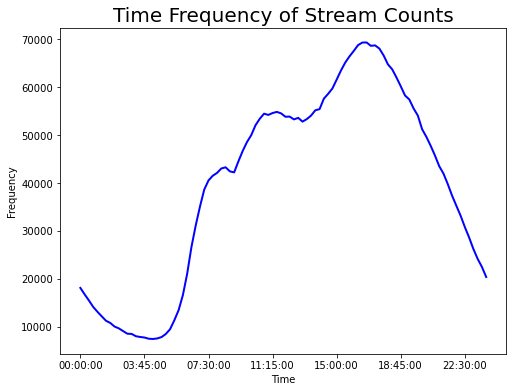

In [28]:
# Plot the time frequency of streams during a day

x = df['time']
y = df['counts']

def lineplot(x, y, x_label="Time", y_label="Frequency", title="Time Frequency of Stream Counts"):
    __, ax = plt.subplots(figsize=(8,6))

    ax.plot(x, y, lw=2, color ='blue', alpha =3)

    ax.set_xticks(ax.get_xticks()[::15])
    ax.set_title(title,fontsize=20)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
lineplot(x, y)

### Top 20 playlist

In [29]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,time
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,14:00:00
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:45:00
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:15:00


In [30]:
# Group by the playlist
playlist_count= data['playlist_name'].value_counts().reset_index().rename(columns = {"index": "playlist_name", "playlist_name": "number_of_stream"})
top20_playlist=playlist_count[:21]
top20_playlist = top20_playlist.drop(0) # drop null value 
top20_playlist

,playlist_name,number_of_stream
1,Today's Top Hits,105383
2,Topsify UK Top 40,54982
3,Freshness: Hot House Music,32961
4,The Pop List,28630
5,New Music Monday UK,27793
6,Happy Hits!,18767
7,Summer Hits,16822
8,Top Tracks in The United Kingdom,15524
9,You've Got Male - R&B: The Men,14777
10,#MondayMotivation,12727


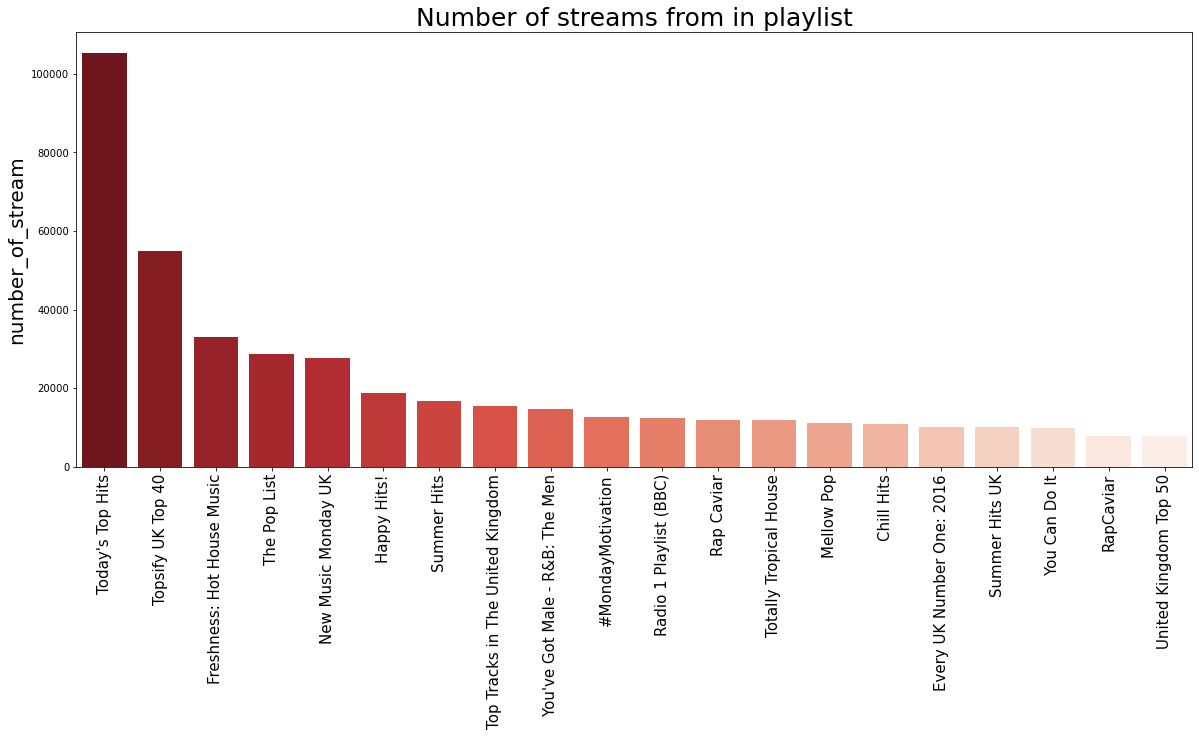

In [31]:
# Plot top20 playlist.
plt.figure(figsize= (20,8))
f2 = sns.barplot(x=top20_playlist.playlist_name, y=top20_playlist.number_of_stream,palette=("Reds_r")).set_title('Number of streams from in playlist',fontsize=25)
plt.xticks(fontsize=15,rotation=90)
plt.xlabel('')
plt.ylabel('number_of_stream',fontsize = 20)
plt.show()

### Artist

In [32]:
# Group by the artist
artist_count= data['artist_name'].value_counts().reset_index().rename(columns = {"index": "artist", "artist_name": "number_of_stream"})
top20_artist = artist_count[:20]
top20_artist

,artist,number_of_stream
0,Charlie Puth,447873
1,Dua Lipa,315663
2,Lukas Graham,311271
3,Cheat Codes,255820
4,Anne-Marie,247934
5,Matoma,212210
6,gnash,165683
7,WSTRN,164885
8,Lil Uzi Vert,146692
9,The Hunna,132287


In [33]:
top20_playlist

,playlist_name,number_of_stream
1,Today's Top Hits,105383
2,Topsify UK Top 40,54982
3,Freshness: Hot House Music,32961
4,The Pop List,28630
5,New Music Monday UK,27793
6,Happy Hits!,18767
7,Summer Hits,16822
8,Top Tracks in The United Kingdom,15524
9,You've Got Male - R&B: The Men,14777
10,#MondayMotivation,12727


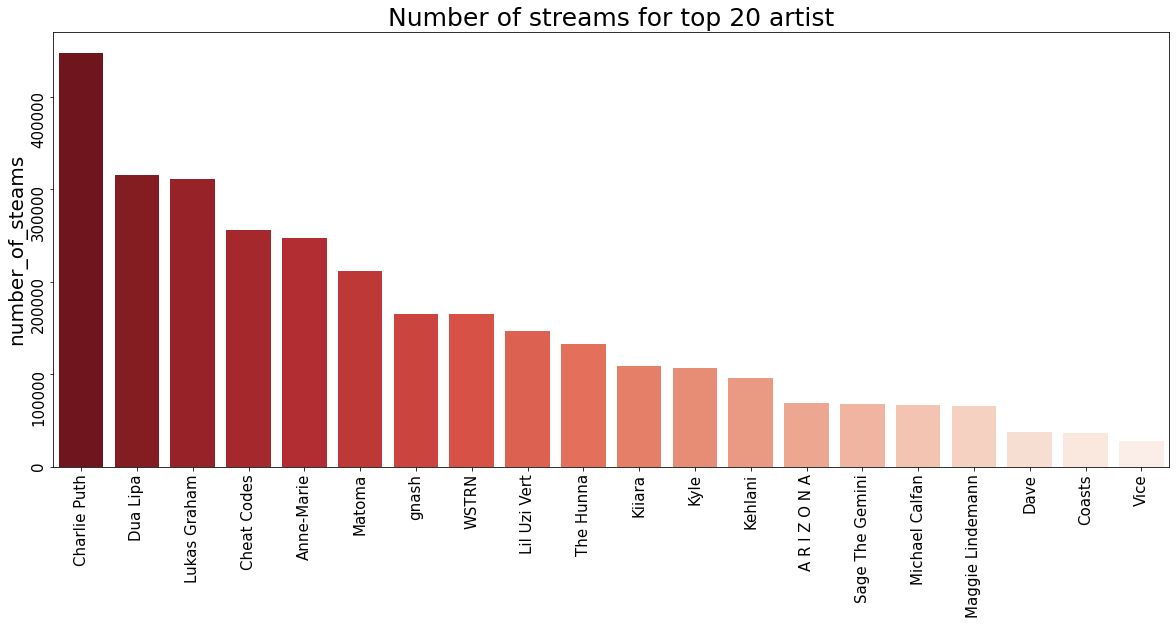

In [34]:
# Plot top20 artist.
plt.figure(figsize= (20,8))
f2 = sns.barplot(x=top20_artist.artist, y=top20_artist.number_of_stream,palette=("Reds_r")).set_title('Number of streams for top 20 artist',fontsize=25)

plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=90)
plt.xlabel('')
plt.ylabel('number_of_steams',fontsize=20)
plt.show()

# Data Preperation and Feature Engineering
<br>
From our business understanding, we know that our criteria for success is whether or not an artist has been on one of 4 key playlists.  The column ‘stream_source_uri’, contains data about the source of the stream – whether it was from an artist’s page, an album, a playlist etc. 

For streams coming from different playlists, only the Spotify URI code is provided. To make sense of this column and identify our key playlists, we can use the additional table provided that we cleaned above and named 'playlist_mapper'.

We can being by out data preperation by subsetting the 4 key playlists we are interested in and creating our dependent variable:

**Create Dependent Variable**

<div class="alert alert-warning">
<b>ACTION: Dependant variable </b> 

<p> Set up the problem as one of classification, selecting the relevant playlists as the variable we are trying to model.</p>

<p> Write useful helper functions to support creating of the feature vector and target vector </p>


</div>

In [42]:
len(np.unique(data.artist_name.values))

661

In [43]:
data['count']=1
metric=pd.DataFrame(data.groupby(by=['artist_name','playlist_name'])['count'].sum())
metric['list_count']=1
metric

count  \
artist_name playlist_name                                               
#90s Update After Work House                                        3   
            ENERGY - HIT MUSIC ONLY!                                1   
17 Memphis  Wild Country                                            6   
99 Percent  99 Percent ? iTwerk (She Twerk)i                        1   
            BassBoosted???                                          1   
...                                                               ...   
gnash       wake up playlist?                                       1   
            we can hurt together                                    1   
            work out playlist                                       1   
            |Solo Dance - Martin Jensen|Setting Fire - The ...      1   
livetune+   J-Track Makunouchi                                      1   

                                                                list_count  
artist_name playlist_name                                                   
#90s Update After Work House                                             1  
            ENERGY - HIT MUSIC ONLY!                                     1  
17 Memphis  Wild Country                                                 1  
99 Percent  99 Percent ? iTwerk (She Twerk)i                             1  
            BassBoosted???                                               1  
...                                                                    ...  
gnash       wake up playlist?                                            1  
            we can hurt together                                         1  
            work out playlist                                            1  
            |Solo Dance - Martin Jensen|Setting Fire - The ...           1  
livetune+   J-Track Makunouchi                                           1  

[18659 rows x 2 columns]

In [44]:
# 4 key Playlists
# select relevant playlists 
rel_list=['Hot Hits UK','Massive Dance Hits','The Indie List','New Music Friday']
# Define Dependent Variable
def get_successful_artists(data):
    global rel_list
    artists=[]
    for i,j in data.index:
        if j in rel_list and i not in artists:
            artists.append(i)
    return artists
  
def get_successful_before_2017(data,artists):
    data['success']=0
    for i in data.index:
        if i in artists:
            data.loc[i,'success']=1

Now that we have created our dependent variable – whether an artist is successful or not, we can look at generating a set of features, based on the columns within our dataset, that we think might best explain the reasons for this success. 

**FEATURE ENGINEERING**

There are a large number of factors that could have an impact on the success of an artist, such as the influence of a playlist, or the popularity of an artist in a certain geographical region. 

To build a predictive model for this problem, we first need to turn these (largely qualitative) factors into measurable quantities. Characteristics like ‘influence’ and ‘popularity’ need to be quantified and standardized for all artists, to allow for a fair comparison. 

The accurateness of these numerical estimates will be the fundamental driver of success for any model we build. 
There are many approaches one might take to generate features. Based on the data columns available to us, a sensible approach is to divide our feature set into three groups:

1.	Artist Features
2.	Playlist Features
3.	User-base features


## Artist features

*	Stream count
*	Total Number of users
*	Passion Score 

The metric passion score is a metric suggested to us by Warner business analysts. 

It is defined as the number of stream divided by the total number of users. 

Warner analysts believe that repeated listens by a user is a far more indicative future success that simply total number of listens or total unique users. By including this in your model, we can evaluate whether this metric in fact might be of any significance.

<div class="alert alert-warning">
<b>ACTION: Artist features </b> 

<p> Write useful functions to create these new features. </p>


</div>

In [45]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'day', 'log_time',
       'mobile', 'track_id', 'isrc', 'upc', 'artist_name', 'track_name',
       'album_name', 'customer_id', 'postal_code', 'access', 'country_code',
       'gender', 'birth_year', 'filename', 'region_code', 'referral_code',
       'partner_name', 'financial_product', 'user_product_type',
       'offline_timestamp', 'stream_length', 'stream_cached', 'stream_source',
       'stream_source_uri', 'stream_device', 'stream_os', 'track_uri',
       'track_artists', 'source', 'DateTime', 'hour', 'minute', 'week',
       'month', 'year', 'date', 'weekday', 'weekday_name', 'playlist_id',
       'playlist_name', 'age', 'time', 'count'],
      dtype='object')

In [46]:
passion=pd.DataFrame(data.groupby(by=['artist_name','customer_id'])['count'].sum())
passion.head()

count
artist_name customer_id                            
#90s Update 060829bb9523804e94dc5b55f1815a4d      1
            08d6aeb029ebbcd6cd35ec6d5671bd5c      1
            103e75ac52f3cfe3b89fc6bc0239ac90      1
            1519ce92bd7b2b5d1fc00b98a9d8d4b8      2
            38e53d422f5c326d1e34bc354b880645      1

In [47]:
# Number of users per artist
stream_count=passion.groupby(by='artist_name')['count'].sum().values
stream_count.shape

(661,)

In [48]:
# Stream count per artist
passion['user_count']=1
user_count=passion.groupby(by='artist_name')['user_count'].sum().values
user_count.shape

(661,)

In [49]:
# Passion Score
passion_score=stream_count/user_count
passion_score.shape

(661,)

## Playlist Features

Understanding an artist’s growth as a function of his/her movement across different playlists is potentially key to understanding how to identify and breakout new artists on Spotify. 

In turn, this could help us identify the most influential playlists and the reasons for their influence.

One way to model the effect of playlists on an artist’s performance has been to include them as categorical features in our model, to note if there are any particular playlists or combinations of playlists that are responsible for propelling an artist to future success:

### *Artist Feature 1 + Artist Feature 2 …. + Artist Feature N = Probability of Success*
**
Success (1) = Artist Features on Key Playlist
Failure (0) = Artist Not Featured on Key Playlist
**

Where,

**
⇒Artist Feature N = Prior Playlist 1 + Prior Playlist 2 +…Prior Playlist N
**


Given that we have over 19,000 playlists in our dataset or 600 artists, using the playlists each artist has featured on, as categorical variables would lead to too many features and a very large, sparse matrix. 

Instead, we need to think of ways to summarize the impact of these playlists. One way to do this would be to consider the top 20 playlists each artist has featured on. 

Even better would be to come up with one metric that captures the net effect of all top 20 prior playlists, for each artist, rather including using all 20 playlists for each artists as binary variables. The intuition here is that if this metric as a whole has an influence on the performance of an artist, it would suggest that rather than the individual playlists themselves, it is a combination of their generalized features that affects the future performance of an artist. 

Accordingly, different combinations of playlists could equate to having the same impact on an artist, thereby allowing us to identify undervalued playlists.

Some of the features such a metric could use is the number of unique users or ‘reach’, number of stream counts, and the passion score of each playlist

* Prior Playlist Stream Counts
* Prior Playlist Unique Users (Reach)
* Prior Playlist Passion Score

There are several other such features that you could generate to better capture the general characteristics of playlists, such as the average lift in stream counts and users they generate for artists that have featured on them. 

The code to calculate these metrics is provided below:

<div class="alert alert-warning">
<b>ACTION: Playlist features </b> 

<p> Write useful functions to create new playlist features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest, work in your group to think about what other features might be useful and whether you can calculate them with the data you have </p>

</div>

In [50]:
# you could divide up the work in the group by getting different people to calculate different features 
top_20=data.playlist_name.value_counts().index[:20]
def playlist_avg_stream_counts(data):
    global top_20
    group=pd.DataFrame(data.groupby(by=['artist_name','playlist_name'])['count'].sum())
    group['list_count']=1
    stream=dict([(i,0) for i,j in group.index])
    count=dict([(i,0) for i,j in group.index])
    for i,j in group.index:
        if j in top_20:
            stream[i]+=group.loc[(i,j),'count']
            count[i]+=1
    for x,y in stream.items():
        for i,j in count.items():
            if x==i and j!=0:
                stream[x]=y/j
            elif x==i and j==0:
                stream[x]=0
    return stream

def playlist_avg_number_of_users(data):
    global top_20
    group=pd.DataFrame(data.groupby(by=['artist_name','playlist_name','customer_id'])['count'].sum())
    group['user_count']=1
    group=pd.DataFrame(group.groupby(by=['artist_name','playlist_name'])['user_count'].sum())
    user=dict([(i,0) for i,j in group.index])
    count=dict([(i,0) for i,j in group.index])
    for i,j in group.index:
        if j in top_20:
            user[i]+=group.loc[(i,j),'user_count']
            count[i]+=1
    for x,y in user.items():
        for i,j in count.items():
            if x==i and j!=0:
                user[x]=y/j
            elif x==i and j==0:
                user[x]=0
    return user

# define a function that can call the number of stream for future uses
def get_stream_per_list(data):
    group=pd.DataFrame(data.groupby(by=['artist_name','playlist_name'])['count'].sum())
    return group['count']

def playlist_avg_passion_score(data):# sum(stream/user)/num(count)
    global top_20
    group=pd.DataFrame(data.groupby(by=['artist_name','playlist_name','customer_id'])['count'].sum())
    group['user_count']=1
    group=pd.DataFrame(group.groupby(by=['artist_name','playlist_name'])['user_count'].sum())
    group['passion']=get_stream_per_list(data).values/group['user_count'].values
    passion=dict([(i,0) for i,j in group.index])
    count=dict([(i,0) for i,j in group.index])
    for i,j in group.index:
        if j in top_20:
            passion[i]+=group.loc[(i,j),'passion']
            count[i]+=1
    for x,y in passion.items():
        for i,j in count.items():
            if x==i and j!=0:
                passion[x]=y/j
            elif x==i and j==0:
                passion[x]=0
    return passion

def playlist_avg_stream_length(data):
    global top_20
    group=pd.DataFrame(data.groupby(by=['artist_name','playlist_name'])['stream_length'].sum())
    length=dict([(i,0) for i,j in group.index])
    count=dict([(i,0) for i,j in group.index])
    for i,j in group.index:
        if j in top_20:
            length[i]+=group.loc[(i,j),'stream_length']
            count[i]+=1
    for x,y in length.items():
        for i,j in count.items():
            if x==i and j!=0:
                length[x]=y/j
            elif x==i and j==0:
                length[x]=0
    return length

# make sure you think they are actually being calculated correctly
# how could you demonstrate the code you write is working correctly?

In [51]:
# create a dataframe for the model
final=pd.DataFrame(data.groupby('artist_name')['count'].sum())
final['playlist_num']=data.groupby('artist_name').playlist_name.nunique()
final['passion']=passion_score
# initialise some values
final['playlist_stream']=0
final['playlist_user']=0
final['playlist_passion']=0
final['playlist_stream_len']=0
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len
artist_name,,,,,,,
#90s Update,16,2,1.066667,0,0,0,0
17 Memphis,12,1,1.000000,0,0,0,0
2D,1,0,1.000000,0,0,0,0
3JS,5,0,1.250000,0,0,0,0
99 Percent,1291,18,1.085786,0,0,0,0
...,...,...,...,...,...,...,...
birthday,20,1,1.000000,0,0,0,0
dvsn,25168,141,1.345019,0,0,0,0
flor,109,12,1.009259,0,0,0,0


In [52]:
play_stream=playlist_avg_stream_counts(data)
play_user=playlist_avg_number_of_users(data)
play_passion=playlist_avg_passion_score(data)
play_len=playlist_avg_stream_length(data)

In [53]:
for i in play_stream.keys():
    final.loc[i,'playlist_stream']=play_stream[i]
for i in play_user.keys():
    final.loc[i,'playlist_user']=play_user[i]
for i in play_passion.keys():
    final.loc[i,'playlist_passion']=play_passion[i]
for i in play_len.keys():
    final.loc[i,'playlist_stream_len']=play_len[i]
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len
artist_name,,,,,,,
#90s Update,16,2,1.066667,0.0000,0.0000,0.000000,0.0000
17 Memphis,12,1,1.000000,0.0000,0.0000,0.000000,0.0000
2D,1,0,1.000000,0.0000,0.0000,0.000000,0.0000
3JS,5,0,1.250000,0.0000,0.0000,0.000000,0.0000
99 Percent,1291,18,1.085786,0.0000,0.0000,0.000000,0.0000
...,...,...,...,...,...,...,...
birthday,20,1,1.000000,0.0000,0.0000,0.000000,0.0000
dvsn,25168,141,1.345019,1.5000,1.5000,1.000000,389.5000
flor,109,12,1.009259,0.0000,0.0000,0.000000,0.0000


## User-base features

We can use the age and gender columns to create an audience profile per artist.
*	Gender Percentage Breakdown
*	Age vector quantization 


In [54]:
data.playlist_name.value_counts()

Hot Hits UK                      193654
Today's Top Hits                 105383
Topsify UK Top 40                 54982
Freshness: Hot House Music        32961
The Pop List                      28630
                                  ...  
>>>>                                  1
Lighten Up                            1
Your EDM Year In Music - 2015         1
work playlist (clean)                 1
OneRepublic Discography               1
Name: playlist_name, Length: 7102, dtype: int64

In [55]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,day,log_time,mobile,track_id,isrc,upc,artist_name,track_name,album_name,customer_id,postal_code,access,country_code,gender,birth_year,filename,region_code,referral_code,partner_name,financial_product,user_product_type,offline_timestamp,stream_length,stream_cached,stream_source,stream_source_uri,stream_device,stream_os,track_uri,track_artists,source,DateTime,hour,minute,week,month,year,date,weekday,weekday_name,playlist_id,playlist_name,age,time,count
0,0,9,"('small_artists_2016.csv', 9)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,277.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00,1
1,1,19,"('small_artists_2016.csv', 19)",10,20160510T12:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6c022a8376c10aae37abb839eb7625fe,NE,free,GB,male,1968.0,streams_20160510_GB.004.gz,GB-DUR,NaN,NaN,NaN,ad,NaN,53.0,NaN,album,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 12:15:00,12,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Senior,12:15:00,1
2,2,29,"('small_artists_2016.csv', 29)",10,20160510T14:00:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,352292382ff3ee0cfd3b73b94ea0ff8f,1,premium,GB,male,1995.0,streams_20160510_GB.002.gz,GB-ESS,NaN,NaN,student,paid,NaN,326.0,NaN,collection,NaN,mobile,Android,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 14:00:00,14,0,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,14:00:00,1
3,3,39,"('small_artists_2016.csv', 39)",10,20160510T10:45:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,c3f2b54e76696ed491d9d8f964c97774,MK,premium,GB,male,1992.0,streams_20160510_GB.007.gz,GB-HRT,NaN,NaN,student,paid,NaN,330.0,NaN,collection,NaN,tablet,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:45:00,10,45,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:45:00,1
4,4,49,"('small_artists_2016.csv', 49)",10,20160510T10:15:00,True,8f1924eab3804f308427c31d925c1b3f,USAT21600547,7.567991e+10,Sturgill Simpson,Call To Arms,A Sailor's Guide to Earth,6a06a9bbe042c73e8f1a3596ec321636,KT,premium,GB,male,1979.0,streams_20160510_GB.004.gz,GB-LND,NaN,NaN,NaN,paid,NaN,90.0,NaN,collection,NaN,mobile,iOS,spotify:track:4m1opmaYT9zk5OP7IHUb9R,Sturgill Simpson,NaN,2016-05-10 10:15:00,10,15,19,5,2016,2016-05-10,1,Tuesday,NaN,NaN,Adult,10:15:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805494,3805494,38054949,1301551,10,20170610T10:30:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,Alarm - Cahill Remix,Alarm,6b1768378525cace7c5d58b05fc6a46a,NaN,premium,GB,male,1990.0,streams_20170610_GB.006.gz,GB-ESX,NaN,NaN,student,paid,NaN,178.0,NaN,collection,NaN,mobile,iOS,spotify:track:2kM7ASijHVSoMlC49EDsFj,Anne-Marie,NaN,2017-06-10 10:30:00,10,30,23,6,2017,2017-06-10,5,Saturday,NaN,NaN,Adult,10:30:00,1
3805495,3805495,38054959,1301561,10,20170710T18:15:00,True,4cb959db5be04d2fa5ca4c137b651a99,GBAHS1600395,1.902959e+11,Anne-Marie,Alarm - Cahill Remix,Alarm,29cac70448bc684ca8772fae159a4c0b,NaN,premium,GB,male,1981.0,streams_20170710_GB.002.gz,GB-STE,NaN,vodafone-uk,hardbundle,partner,NaN,178.0,NaN,collection,NaN,mobile,iOS,spotify:track:2kM7ASijHVSoMlC49EDsFj,Anne-Marie,NaN,2017-07-10 18:15:00,18,15,28,7,2017,2017-07-10,0,Monday,NaN,NaN,Adult,18:15:00,1
3805496,3805496,38054969,1301571,10,20170710T18:00:00,

<div class="alert alert-warning">
<b>ACTION: User features </b> 

<p> Write useful functions to create new user features, like those listed in the cell above. </p>

<p> Are there other sensible ones you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

In [56]:
gender=pd.DataFrame(data.groupby(by=['artist_name','gender'])['count'].sum())
gender

count
artist_name gender       
#90s Update female      7
            male        9
17 Memphis  female      8
            male        4
2D          male        1
...                   ...
gnash       0        1974
            female  97092
            male    66617
livetune+   female      3
            male        4

[1501 rows x 1 columns]

In [57]:
# Gender breakdown
breakdown=data.set_index(['artist_name'])[['customer_id','gender']]
index =np.unique(breakdown.index)
def gender_percentage(df):
    if (len(df)!=0):
        df = df.drop_duplicates(subset = ['customer_id'])
        perc = len(df[df.gender == 'male'])/len(df)
        return perc
    else:
        return 0
gender=[]
for i in index:
    df=breakdown.loc[[i]]
    gender.append(gender_percentage(df))

In [58]:
# Age breakdown
breakdown=data.set_index(['artist_name'])[['customer_id','age']]
def age_percentages(df):
    df = df.drop_duplicates(subset = ['customer_id'])
    categories=df.age
    return {y:x for x,y in zip(categories.value_counts(True),categories.value_counts(True).keys())}
age=[]
for i in index:
    df=breakdown.loc[[i]]
    age.append(age_percentages(df))

In [59]:
final['gender']=gender
dep=[]
young=[]
adult=[]
senior=[]
for i in age:
    dep.append(i['Dependent'])
    young.append(i['YoungAdult'])
    adult.append(i['Adult'])
    senior.append(i['Senior'])
final['Dependent']=dep
final['YoungAdult']=young
final['Adult']=adult
final['Senior']=senior

In [60]:
# value counts for mobile streams
breakdown=data.set_index(['artist_name'])[['mobile']]
index =np.unique(breakdown.index)
def mobile_percentage(df):
    if (len(df)!=0):
        perc = len(df[df.mobile == True])/len(df)
        return perc
    else:
        return 0
mobile_pec=[]
for i in index:
    df=breakdown.loc[[i]]
    mobile_pec.append(mobile_percentage(df))
final['mobile_perc']=mobile_pec

**Principle Component Analysis**

The data also contains a partial region code of the listener. We might want to consider including the regional breakdown of streams per artist as a feature of our model, to know if streams for certain regions are particularly influential on the future performance of an artist. 

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets. 

This is however beyond the scope of this courswork. Instead, a better way to summarize the impact of regional variation in streams is to use dimensionality reduction techniques. Here we will use Principle Component Analysis (PCA) to capture the regional variation in stream count.

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. Use **`scikit-learn`**’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

For a comprehensive understanding of how sklearn's PCA module works, please refer to the sklearn documentation. We will using 10 components of PCA in our model.

*Note: We could also apply a similar method to condense variation in stream across the 19,600 different playlists in our dataset.*

<div class="alert alert-warning">
<b>ACTION: PCA features </b> 

<p> Write useful functions to create new user feature based on regions data. </p>

<p> Are there other sensible features you could suggest? Work in your group to think about what other features might be useful and whether you can calculate them with the data you have. Justify your reasoning. </p>

</div>

In [61]:
data['region_code']=data.region_code.fillna('unkonwn')

In [62]:
breakdown=data.set_index(['artist_name'])[['region_code']]
def region_percentages(df):
    categories=df.region_code
    '''
    set y to str so that it can be accetped by numpy function without dtypes conflicting
    '''
    return {str(y):x for x,y in zip(categories.value_counts(True),categories.value_counts(True).keys())}
region={}
for i in index:
    df=breakdown.loc[[i]]
    region[i]=region_percentages(df)

In [63]:
a= pd.DataFrame({index[0]:region[index[0]]})
for i in index[1:]:
    b= pd.DataFrame({i:region[i]})
    a=pd.merge(a,b,left_index=True,right_index=True,how='outer')
a=a.T.fillna(0)

In [66]:
# Region Code PCA
from sklearn import decomposition
region=a
pca = decomposition.PCA(n_components=10)
pca.fit(region)
pca_regions_output = pca.transform(region)
pca_regions_output 

array([[ 1.90969524e-02,  2.12933324e-02,  5.00357159e-02, ...,
        -1.68695247e-04,  6.03611108e-03, -2.23667107e-03],
       [-9.48285542e-02,  7.76642787e-03,  6.15463337e-02, ...,
         8.88226521e-02,  6.48619763e-03,  7.05043882e-03],
       [-9.88477848e-02, -1.77244712e-01, -3.01623060e-02, ...,
        -4.20970127e-03,  4.92980112e-02,  2.75876875e-02],
       ...,
       [ 1.52286756e-02, -7.06677556e-02, -5.61502436e-03, ...,
        -2.46400604e-03, -7.05512021e-03, -6.07137373e-03],
       [ 2.09548760e-02, -7.96502041e-02, -2.27949694e-03, ...,
        -1.82559081e-03,  2.18805006e-03, -9.21865175e-03],
       [-2.21379553e-01,  7.94332768e-02, -2.75557397e-02, ...,
         5.30978263e-03,  1.02114009e-02, -8.12487569e-03]])

In [67]:
pca_regions_output.shape

(661, 10)

<div class="alert alert-danger">
<b>WARNING: PCA features </b> 
    
<p>If you struggle to complete this section successfully <b>please email me</b> and we will provide code to compute the new features. This will help with performance of the classifier in the next stage.</p>
</div>

Check the PCA feature table to make sure the dataframe looks as expected. Comment on anything the looks important. 

<div class="alert alert-warning">
<b>ACTION: PCA plot </b> 

<p> Use a figure to show which components of PCA explain the majority of variation in the data. Accordingly, use only those components in your further analysis.</p>

</div>

**Data transformation**

The final step is to decide whether or not to normalize/transform any of the features. 

We should normalize data if we are more interested in the relative rather than absolute differences between variables. Given that all the numerical features in our dataset (centrality, lift, influence, gender breakdown, age breakdown) were meaningful, i.e. distances did make a difference;

<div class="alert alert-warning">
<b>ACTION: Feature transformation </b> 

<p> Comment on whether transforming particular features (influence, gender breakdown, age breakdown) is useful. Calculate the transformation where necessary.</p>

</div>


Now we can combine all of our features that we generated above, into a dataframe that can be processed by a machine learning algorithm:

In [68]:
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,Adult,Senior,mobile_perc
artist_name,,,,,,,,,,,,,
#90s Update,16,2,1.066667,0.0000,0.0000,0.000000,0.0000,0.600000,0.000000,0.066667,0.933333,0.000000,0.312500
17 Memphis,12,1,1.000000,0.0000,0.0000,0.000000,0.0000,0.333333,0.000000,0.166667,0.750000,0.083333,0.500000
2D,1,0,1.000000,0.0000,0.0000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
3JS,5,0,1.250000,0.0000,0.0000,0.000000,0.0000,0.750000,0.000000,0.000000,1.000000,0.000000,0.400000
99 Percent,1291,18,1.085786,0.0000,0.0000,0.000000,0.0000,0.315391,0.013536,0.523689,0.398477,0.064298,0.831913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthday,20,1,1.000000,0.0000,0.0000,0.000000,0.0000,0.400000,0.050000,0.300000,0.650000,0.000000,0.500000
dvsn,25168,141,1.345019,1.5000,1.5000,1.000000,389.5000,0.452170,0.001339,0.346799,0.608894,0.042968,0.749841
flor,109,12,1.009259,0.0000,0.0000,0.000000,0.0000,0.527778,0.000000,0.370370,0.546296,0.083333,0.642202


In [69]:
# variables 
pac_col=['region_{}'.format(i) for i in range(1,11)]
final[pac_col]=pca_regions_output
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,Adult,Senior,mobile_perc,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10
artist_name,,,,,,,,,,,,,,,,,,,,,,,
#90s Update,16,2,1.066667,0.0000,0.0000,0.000000,0.0000,0.600000,0.000000,0.066667,0.933333,0.000000,0.312500,0.019097,0.021293,0.050036,-0.006150,-0.011082,-0.010661,-0.006864,-0.000169,0.006036,-0.002237
17 Memphis,12,1,1.000000,0.0000,0.0000,0.000000,0.0000,0.333333,0.000000,0.166667,0.750000,0.083333,0.500000,-0.094829,0.007766,0.061546,-0.018794,0.063932,0.004991,-0.003965,0.088823,0.006486,0.007050
2D,1,0,1.000000,0.0000,0.0000,0.000000,0.0000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-0.098848,-0.177245,-0.030162,-0.025097,-0.036290,-0.006003,-0.020753,-0.004210,0.049298,0.027588
3JS,5,0,1.250000,0.0000,0.0000,0.000000,0.0000,0.750000,0.000000,0.000000,1.000000,0.000000,0.400000,0.083521,-0.088610,-0.002793,-0.025502,-0.014124,-0.025185,-0.031067,-0.012267,0.034544,-0.072022
99 Percent,1291,18,1.085786,0.0000,0.0000,0.000000,0.0000,0.315391,0.013536,0.523689,0.398477,0.064298,0.831913,-0.002327,-0.095925,-0.001027,-0.010181,-0.002946,0.005956,-0.003000,-0.002409,0.002101,-0.014098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthday,20,1,1.000000,0.0000,0.0000,0.000000,0.0000,0.400000,0.050000,0.300000,0.650000,0.000000,0.500000,-0.006745,-0.131709,-0.025119,-0.017710,-0.041221,0.020886,0.041039,-0.001347,-0.016049,-0.006501
dvsn,25168,141,1.345019,1.5000,1.5000,1.000000,389.5000,0.452170,0.001339,0.346799,0.608894,0.042968,0.749841,0.090354,-0.030347,-0.010174,-0.005562,0.008239,0.009825,0.000862,0.000277,-0.005232,-0.001791
flor,109,12,1.009259,0.0000,0.0000,0.000000,0.0000,0.527778,0.000000,0.370370,0.546296,0.083333,0.642202,0.015229,-0.070668,-0.005615,-0.004059,-0.015596,0.029126,0.012704,-0.002464,-0.007055,-0.006071


In [70]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=final.values
scale.fit(X)
final.iloc[:,:]=scale.transform(X)
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,Adult,Senior,mobile_perc,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10
artist_name,,,,,,,,,,,,,,,,,,,,,,,
#90s Update,-0.176036,-0.236474,-0.114164,-0.244008,-0.245318,-0.494726,-0.239804,0.074822,-0.113639,-0.829409,1.183613,-0.597806,-1.635444,0.104975,0.126121,0.634484,-0.087578,-0.177092,-0.175726,-0.119103,-0.003057,0.114550,-0.043370
17 Memphis,-0.176158,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-1.079349,-0.113639,-0.275048,0.314162,-0.074972,-0.796245,-0.521267,0.046001,0.780446,-0.267645,1.021632,0.082277,-0.068800,1.609718,0.123092,0.136710
2D,-0.176496,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,1.806078,24.170187,-1.198982,-3.242679,-0.597806,1.441618,-0.543361,-1.049829,-0.382477,-0.357397,-0.579910,-0.098945,-0.360090,-0.076292,0.935553,0.534932
3JS,-0.176373,-0.254505,0.107819,-0.244008,-0.245318,-0.494726,-0.239804,0.724043,-0.113639,-1.198982,1.499776,-0.597806,-1.243818,0.459112,-0.524841,-0.035420,-0.363171,-0.225705,-0.415144,-0.539055,-0.222316,0.655556,-1.396514
99 Percent,-0.136942,-0.092219,-0.091014,-0.244008,-0.245318,-0.494726,-0.239804,-1.157005,0.215076,1.704141,-1.352919,-0.194401,0.689308,-0.012791,-0.568168,-0.013028,-0.144984,-0.047073,0.098181,-0.052048,-0.043656,0.039862,-0.273365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthday,-0.175913,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-0.790806,1.100552,0.464099,-0.160083,-0.597806,-0.796245,-0.037077,-0.780118,-0.318522,-0.252207,-0.658716,0.344275,0.712070,-0.024410,-0.304565,-0.126063
dvsn,0.595172,1.016740,0.222871,-0.240012,-0.241148,1.990384,-0.234124,-0.565008,-0.081113,0.723533,-0.355028,-0.328224,0.321975,0.496672,-0.179749,-0.129018,-0.079200,0.131656,0.161953,0.014948,0.005020,-0.099296,-0.034722
flor,-0.173184,-0.146314,-0.183675,-0.244008,-0.245318,-0.494726,-0.239804,-0.237766,-0.113639,0.854205,-0.651893,-0.074972,-0.159789,0.083711,-0.418569,-0.071202,-0.057804,-0.249224,0.480097,0.220427,-0.044655,-0.133889,-0.117725


In [33]:
#final_df = pd.DataFrame(variables)


<div class="alert alert-warning">
<b>ACTION: Feature transformation </b> 

<p> Comment on whether transforming particular features (influence, gender breakdown, age breakdown) is useful. Calculate the transformation where necessary.</p>

</div>

**Preprocessing**

Before we can run any models on our dataset, we must make sure it is prepared and cleaned to avoid errors in results. This stage is generally refered to as preprocessing.

To begin with, we need to deal with missing data in the dataframe - the ML algorithm will not be able to process NaN or missing values. 

For this study, we will be imputing missing numerical values, and filling any one which we were not able to imput, with 0.

<div class="alert alert-warning">
<b>ACTION: Missing values </b> 

<p> Use the <b>Imputer</b> class to alter your final Dataframe that contains your feature vector.</p>

</div>

In [71]:
#nan has been cleaned before
final.isna().sum()

count                  0
playlist_num           0
passion                0
playlist_stream        0
playlist_user          0
playlist_passion       0
playlist_stream_len    0
gender                 0
Dependent              0
YoungAdult             0
Adult                  0
Senior                 0
mobile_perc            0
region_1               0
region_2               0
region_3               0
region_4               0
region_5               0
region_6               0
region_7               0
region_8               0
region_9               0
region_10              0
dtype: int64

In [35]:
# # Handle missing values
# from sklearn.impute import SimpleImputer

# imp = SimpleImputer(strategy='constant')

# #fill remaining nan with 0
# imp.fit_transform(final)

Next, we need to make sure that none of the variables going into the model are collinear, and if so, we need to remove those variables that are highly correlated.

<div class="alert alert-warning">
<b>ACTION: Multi-collinearity </b> 

<p> Check and deal with multi-collinearity in your feature set.</p>

</div>

In [72]:
# Check for multicollinearity
corr = np.corrcoef(final, rowvar=0) # correlation matrix
w, v = np.linalg.eig(corr) # eigen values & eigen vectors
print(w)
final.columns[np.argmin(w)]
#we can see that the enigne value of senior is close to 0 which is caused by multicollenarity
#so we remove senior

[ 5.03066742e+00  2.01533877e+00  1.54402193e+00  2.78795626e-01
  4.78493464e-02  1.26365059e+00  5.61259665e-01  4.82339764e-03
  6.68177049e-01  6.88513651e-01  6.54248582e-05 -5.62326551e-16
  7.85369439e-01  1.13490882e+00  8.95176797e-01  1.08322826e+00
  1.03787197e+00  9.59289675e-01  1.00784207e+00  9.93198794e-01
  9.99944284e-01  9.99991143e-01  1.00001588e+00]


'Senior'

In [73]:
# Remove one of highly correlated varibles (test removing other as well)
final.drop(columns=['Senior'],inplace=True)
#After this everything looks good
corr = np.corrcoef(final, rowvar=0) # correlation matrix
w, v = np.linalg.eig(corr) # eigen values & eigen vectors
print(w)

[5.02761813e+00 1.97333401e+00 4.78482485e-02 4.82337344e-03
 6.54248514e-05 2.79989490e-01 2.70746037e-01 1.31293609e+00
 6.07174833e-01 6.78711812e-01 7.12034868e-01 1.21263293e+00
 8.14721500e-01 1.12596559e+00 9.16061108e-01 1.04238440e+00
 9.61992899e-01 1.01046869e+00 1.00054533e+00 9.99938421e-01
 9.99991023e-01 1.00001579e+00]


In [74]:
#then we get the dependent variables
artists=get_successful_artists(metric)
get_successful_before_2017(final,artists)
final

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,Adult,mobile_perc,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,success
artist_name,,,,,,,,,,,,,,,,,,,,,,,
#90s Update,-0.176036,-0.236474,-0.114164,-0.244008,-0.245318,-0.494726,-0.239804,0.074822,-0.113639,-0.829409,1.183613,-1.635444,0.104975,0.126121,0.634484,-0.087578,-0.177092,-0.175726,-0.119103,-0.003057,0.114550,-0.043370,0
17 Memphis,-0.176158,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-1.079349,-0.113639,-0.275048,0.314162,-0.796245,-0.521267,0.046001,0.780446,-0.267645,1.021632,0.082277,-0.068800,1.609718,0.123092,0.136710,0
2D,-0.176496,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,1.806078,24.170187,-1.198982,-3.242679,1.441618,-0.543361,-1.049829,-0.382477,-0.357397,-0.579910,-0.098945,-0.360090,-0.076292,0.935553,0.534932,0
3JS,-0.176373,-0.254505,0.107819,-0.244008,-0.245318,-0.494726,-0.239804,0.724043,-0.113639,-1.198982,1.499776,-1.243818,0.459112,-0.524841,-0.035420,-0.363171,-0.225705,-0.415144,-0.539055,-0.222316,0.655556,-1.396514,0
99 Percent,-0.136942,-0.092219,-0.091014,-0.244008,-0.245318,-0.494726,-0.239804,-1.157005,0.215076,1.704141,-1.352919,0.689308,-0.012791,-0.568168,-0.013028,-0.144984,-0.047073,0.098181,-0.052048,-0.043656,0.039862,-0.273365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
birthday,-0.175913,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-0.790806,1.100552,0.464099,-0.160083,-0.796245,-0.037077,-0.780118,-0.318522,-0.252207,-0.658716,0.344275,0.712070,-0.024410,-0.304565,-0.126063,0
dvsn,0.595172,1.016740,0.222871,-0.240012,-0.241148,1.990384,-0.234124,-0.565008,-0.081113,0.723533,-0.355028,0.321975,0.496672,-0.179749,-0.129018,-0.079200,0.131656,0.161953,0.014948,0.005020,-0.099296,-0.034722,1
flor,-0.173184,-0.146314,-0.183675,-0.244008,-0.245318,-0.494726,-0.239804,-0.237766,-0.113639,0.854205,-0.651893,-0.159789,0.083711,-0.418569,-0.071202,-0.057804,-0.249224,0.480097,0.220427,-0.044655,-0.133889,-0.117725,1


In [75]:
final.to_csv('final_model.csv')

Finally, we want to take a look out the class balance in our dependent variable.

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. Based on our complete (unbalanced classes) training sample, if the model only predicted ‘failure’, we would achieve an accuracy of 88.8%. 

To give us a more even class balance, without losing too much data, we will sample data from the bigger class to achive a class balance closer to 60-40. 

There is another way to determine the accuracy of our predictions using a confusion matrix and ROC curve, but more on that later. For now, we will go ahead with sampling the bigger class:

In [14]:
final=pd.read_csv('final_model.csv')
final.head()

,artist_name,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,...,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,success
0,#90s Update,-0.176036,-0.236474,-0.114164,-0.244008,-0.245318,-0.494726,-0.239804,0.074822,-0.113639,...,0.126121,0.634488,-0.087689,-0.177626,-0.175676,-0.119340,0.000527,0.115311,-0.039175,0
1,17 Memphis,-0.176158,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-1.079349,-0.113639,...,0.046001,0.780444,-0.267705,1.021803,0.081794,-0.069957,1.604295,0.125082,0.134304,0
2,2D,-0.176496,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,1.806078,24.170187,...,-1.049829,-0.382614,-0.357875,-0.591329,-0.112977,-0.360006,-0.111888,1.114962,0.536436,0
3,3JS,-0.176373,-0.254505,0.107819,-0.244008,-0.245318,-0.494726,-0.239804,0.724043,-0.113639,...,-0.524841,-0.035430,-0.362993,-0.225327,-0.417378,-0.551339,-0.239954,0.679613,-1.447602,0
4,99 Percent,-0.136942,-0.092219,-0.091014,-0.244008,-0.245318,-0.494726,-0.239804,-1.157005,0.215076,...,-0.568168,-0.013031,-0.145024,-0.047283,0.098597,-0.050938,-0.041066,0.042199,-0.273408,0


<div class="alert alert-warning">
<b>ACTION: Class balance </b> 

<p> Calculate and comment on class balance.</p>

</div>

In [15]:
final.drop(columns=['artist_name'],inplace=True)

In [16]:
final.head()

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,...,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,success
0,-0.176036,-0.236474,-0.114164,-0.244008,-0.245318,-0.494726,-0.239804,0.074822,-0.113639,-0.829409,...,0.126121,0.634488,-0.087689,-0.177626,-0.175676,-0.119340,0.000527,0.115311,-0.039175,0
1,-0.176158,-0.245490,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-1.079349,-0.113639,-0.275048,...,0.046001,0.780444,-0.267705,1.021803,0.081794,-0.069957,1.604295,0.125082,0.134304,0
2,-0.176496,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,1.806078,24.170187,-1.198982,...,-1.049829,-0.382614,-0.357875,-0.591329,-0.112977,-0.360006,-0.111888,1.114962,0.536436,0
3,-0.176373,-0.254505,0.107819,-0.244008,-0.245318,-0.494726,-0.239804,0.724043,-0.113639,-1.198982,...,-0.524841,-0.035430,-0.362993,-0.225327,-0.417378,-0.551339,-0.239954,0.679613,-1.447602,0
4,-0.136942,-0.092219,-0.091014,-0.244008,-0.245318,-0.494726,-0.239804,-1.157005,0.215076,1.704141,...,-0.568168,-0.013031,-0.145024,-0.047283,0.098597,-0.050938,-0.041066,0.042199,-0.273408,0


In [17]:
# Class balance
display(final.success.value_counts(True),final.success.value_counts())

0    0.874433
1    0.125567
Name: success, dtype: float64

0    578
1     83
Name: success, dtype: int64

In [18]:
# number of failure to sample:
83/0.4*0.6 #125

124.5

In [19]:
df_model=pd.concat([final[final.success==0].sample(n=125,random_state=10086), final[final.success==1]])

In [20]:
df_model

,count,playlist_num,passion,playlist_stream,playlist_user,playlist_passion,playlist_stream_len,gender,Dependent,YoungAdult,...,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,success
133,-0.173000,-0.236474,-0.139849,-0.244008,-0.245318,-0.494726,-0.239804,-0.908846,-0.113639,1.018460,...,0.172719,0.036860,-0.286854,0.001126,-0.310558,0.160272,-0.100866,-0.194486,-0.057968,0
234,-0.172234,-0.083203,-0.168372,-0.193389,-0.192503,1.990384,-0.189506,-0.121050,-0.113639,0.257731,...,-0.009374,-0.236669,-0.296542,0.356590,-0.191997,-0.041988,-0.071948,0.265093,-0.093065,0
158,-0.176373,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-0.790806,-0.113639,-1.198982,...,0.531404,0.039159,-0.131352,-0.223459,-0.144539,-0.157590,0.032651,0.126311,0.054945,0
141,-0.176404,-0.254505,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,0.724043,-0.113639,-1.198982,...,-1.071418,-0.407702,-0.654840,-0.673319,-0.408995,-0.785382,-0.701070,-1.237636,0.656813,0
15,-0.175238,-0.191394,-0.194886,-0.244008,-0.245318,-0.494726,-0.239804,-0.770196,-0.113639,1.440830,...,-0.723710,0.340030,-0.271272,-0.297386,-0.314511,-0.347394,-0.245776,-0.272527,0.430540,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.650303,0.800357,-0.011378,0.982397,1.019443,2.012272,1.092729,-0.507056,-0.062673,0.213097,...,-0.017850,-0.087752,-0.087007,-0.002967,-0.012437,-0.002038,-0.027688,-0.048463,-0.136428,1
655,0.152200,2.107666,-0.010328,-0.175628,-0.175825,2.002134,-0.171037,-0.571305,-0.063947,-0.102799,...,0.570911,-0.034861,-0.054937,0.011037,0.016524,0.002669,0.001422,-0.083104,0.002677,1
657,0.595172,1.016740,0.222871,-0.240012,-0.241148,1.990384,-0.234124,-0.565008,-0.081113,0.723533,...,-0.179749,-0.129018,-0.079233,0.131442,0.162286,0.016086,0.007688,-0.099121,-0.031734,1
658,-0.173184,-0.146314,-0.183675,-0.244008,-0.245318,-0.494726,-0.239804,-0.237766,-0.113639,0.854205,...,-0.418569,-0.071205,-0.057837,-0.249222,0.479953,0.220818,-0.041299,-0.136061,-0.124929,1


In [21]:
df_model.success.value_counts(True)

0    0.600962
1    0.399038
Name: success, dtype: float64

## 4.	Evaluate algorithms 

**Model Selection**

There are number of classification models available to us via the **`scikit-learn`** package, and we can rapidly experiment using each of them to find the optimal model.

Below is an outline of the steps we will take to arrive at the best model:

*	Split data into training and validation (hold-out) set
*	Use cross-validation to fit different models to training set
*	Select model with the highest cross-validation score as model of choice
*	Tune hyper parameters of chosen model.
*	Test the model on hold-out set


<div class="alert alert-warning">
<b>ACTION: Spot-check algorithms </b> 

<p> Try a mixture of algorithm representations (e.g. instances and trees). </p>

<p> Try a mixture of learning algorithms (e.g. different algorithms for learning the same type of representation).<p>

<p> Try a mixture of modeling types (e.g. linear and nonlinear functions or parametric and nonparametric).</p>

<p> Divide this work up among the different members of your team and then compare and comment on the performance of various approaches.</p>

</div>

In [22]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 133 to 659
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   count                208 non-null    float64
 1   playlist_num         208 non-null    float64
 2   passion              208 non-null    float64
 3   playlist_stream      208 non-null    float64
 4   playlist_user        208 non-null    float64
 5   playlist_passion     208 non-null    float64
 6   playlist_stream_len  208 non-null    float64
 7   gender               208 non-null    float64
 8   Dependent            208 non-null    float64
 9   YoungAdult           208 non-null    float64
 10  Adult                208 non-null    float64
 11  mobile_perc          208 non-null    float64
 12  region_1             208 non-null    float64
 13  region_2             208 non-null    float64
 14  region_3             208 non-null    float64
 15  region_4             208 non-null    f

In [23]:
X=df_model.values[:,:-1]

y=df_model.values[:,-1]

In [24]:
X = X.astype(float)
y = y.astype(int)

In [25]:
# Split into train and validation set
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=12306)
X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,test_size=0.5,random_state=12306)

In [26]:
X_train

array([[-0.17625025, -0.25450543, -0.04353319, ...,  0.1053834 ,
        -0.07431616, -0.13848692],
       [-0.17027118, -0.14631437, -0.04102458, ..., -0.13691115,
        -0.18175345, -0.23534792],
       [-0.17407326, -0.18237805, -0.09671115, ...,  0.07972996,
         0.00634454, -0.54439927],
       ...,
       [-0.17612761, -0.24548951, -0.19488585, ...,  0.02916999,
         0.12630849, -0.29688029],
       [-0.14589497, -0.10123476,  0.00245405, ..., -0.07384835,
        -0.09950953, -0.0163413 ],
       [ 0.19270438,  0.15121106,  0.48469994, ..., -0.00530535,
         0.06056491, -0.13731699]])

Model Name: Logistic | Model CV Score: 0.8137931034482758
Model Name: Random Forest | Model CV Score: 0.8482758620689654
Model Name: SVM | Model CV Score: 0.7862068965517242
Model Name: KNN | Model CV Score: 0.7724137931034483
Model Name: GBC | Model CV Score: 0.8413793103448276
Model Name: Ada | Model CV Score: 0.8068965517241379
Model Name: extra_tree_forest | Model CV Score: 0.8413793103448276


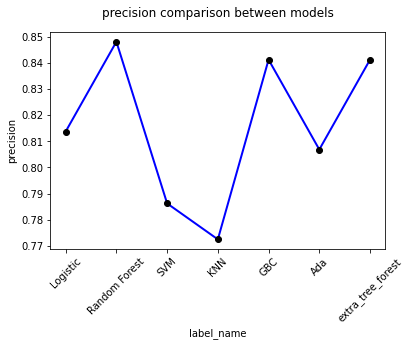

In [60]:
# ------------------ call all the models to be tried -----------------------
log_clf =  LogisticRegression(random_state=12306)
rf =  RandomForestClassifier(n_estimators=100,criterion='gini',random_state=12306)
svc=LinearSVC(C=1,dual=False,random_state=12306)
knn_clf = KNeighborsClassifier()
gbc=GradientBoostingClassifier(random_state=12306)
ada=AdaBoostClassifier(random_state=12306)
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,criterion ='entropy', max_features = 2)


# --------------------- create list of models for iteration -----------------------
clf_list=[log_clf, rf, svc, knn_clf, gbc, ada,extra_tree_forest]
# a list of name is created for visualisation
clf_name=['Logistic', 'Random Forest', 'SVM', 'KNN', 'GBC', 'Ada','extra_tree_forest']

precision=[] # create an empty list for iteration and visualisation
for index in range(len(clf_list)):
    score = cross_val_score(clf_list[index], X_train, y_train, cv=5)
    precision.append(score.mean())
    # print the model name and the precision for comparison
    print("Model Name: {} | Model CV Score: {}".format(clf_name[index], score.mean())) 
    
# ------------------- plot the precision --------------------------------
_= plt.title('precision comparison between models',fontsize=12,y=1.04)
_= plt.plot(clf_name,precision, "b-", linewidth=2)
_= plt.plot(clf_name,precision, "o",color='black')
_= plt.xticks(rotation=45)
_= plt.xlabel('label_name', fontsize=10)
_= plt.ylabel('precision', fontsize=10)
#plt.legend(loc="lower right", fontsize=8,bbox_to_anchor=(1.35, 0))

In [62]:
# Define hyperparameters for model tuning
rf_para = {"min_samples_split": [2, 6, 20],
             "min_samples_leaf": [1, 4, 16],
             "n_estimators": [100, 200, 300, 400],
             "criterion": ["gini"]
             }

#svm
svm_para = [{#'kernel': ['rbf'], #'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    { 'C': [1, 10, 100, 1000]}]


# Define hyperparameters for model tuning
gb_para = {"loss": ["deviance"],
             "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
             "n_estimators": [250, 500],
             "max_depth": [3, 5, 8]
             }

# Define parameters for hyperparameter tuning
params_lg = {"tol": [0.0001, 0.0002, 0.0003],
                "C": [0.01, 0.1, 1, 10, 100],
                "intercept_scaling": [1, 2, 3, 4]
                }
# Define parameters for hyperparameter tuning
et_para = {"max_depth": [1,2,4],
              "max_features": [1,100,1000],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

In [63]:
rf=GridSearchCV(estimator=RandomForestClassifier(),
                               param_grid=rf_para,
                               cv=None,
                               verbose=1,
                               scoring="accuracy",
                               return_train_score=True
                               )
rf.fit(X_train,y_train)
rf.best_score_
rf.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'min_samples_leaf': [1, 4, 16],
                         'min_samples_split': [2, 6, 20],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=1)

0.8689655172413794

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [64]:
rf.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [20]:
lg=GridSearchCV(estimator=LogisticRegression(),
                               param_grid=params_lg,
                               cv=None,
                               verbose=1,
                               scoring="accuracy",
                               return_train_score=True
                               )
lg.fit(X_train,y_train)
lg.best_score_


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

0.8551724137931036

In [21]:
lg.best_params_

{'C': 0.1, 'intercept_scaling': 1, 'tol': 0.0001}

In [22]:
svm=GridSearchCV(estimator=LinearSVC(),
                               param_grid=svm_para,
                               cv=None,
                               verbose=1,
                               scoring="accuracy",
                               return_train_score=True
                               )
svm.fit(X_train,y_train)
svm.best_score_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=LinearSVC(),
             param_grid=[{'C': [1, 10, 100, 1000]}, {'C': [1, 10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=1)

0.8

In [23]:
svm.best_params_

{'C': 1}

In [24]:
gbc=GridSearchCV(estimator=GradientBoostingClassifier(),
                               param_grid=gb_para,
                               cv=None,
                               verbose=1,
                               scoring="accuracy",
                               return_train_score=True
                               )
gbc.fit(X_train,y_train)
gbc.best_score_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'n_estimators': [250, 500]},
             return_train_score=True, scoring='accuracy', verbose=1)

0.8620689655172413

In [25]:
gbc.best_params_

{'learning_rate': 0.25,
 'loss': 'deviance',
 'max_depth': 5,
 'n_estimators': 250}

In [26]:
et = GridSearchCV(estimator=ExtraTreesClassifier(),
                  param_grid = et_para, 
                  cv=5, 
                  scoring="accuracy", 
                  n_jobs= -1, 
                  verbose = 1)

et.fit(X_train,y_train)
et.best_score_

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [1, 2, 4], 'max_features': [1, 100, 1000],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

0.8413793103448276

Text(0.5, 0, 'Mean Accuracy')

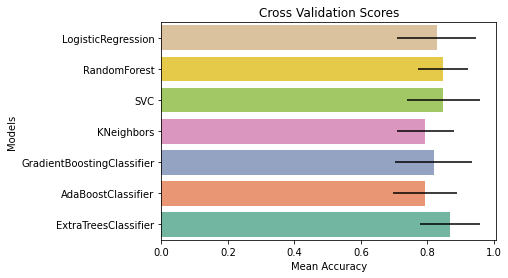

In [29]:
# Use cross validate model with kfold = 10
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
kfold = StratifiedKFold(n_splits=10)

# Modeling to test different models
classifiers = []
classifiers.append(LogisticRegression(random_state = 2))
classifiers.append(RandomForestClassifier(random_state = 2))
classifiers.append(SVC(random_state = 2))
classifiers.append(KNeighborsClassifier())
classifiers.append(GradientBoostingClassifier(random_state = 2))
classifiers.append(AdaBoostClassifier(random_state=2))
classifiers.append(ExtraTreesClassifier(random_state=2))

# Generate cv-related variables
cv = []
for classifier in classifiers:
    cv.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv in cv:
    cv_means.append(cv.mean())
    cv_std.append(cv.std())

cv_2 = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Models":["LogisticRegression","RandomForest",
"SVC","KNeighbors","GradientBoostingClassifier","AdaBoostClassifier","ExtraTreesClassifier"]})

# Plot the scores for the 4 models
cv_scores = sns.barplot("CrossValMeans","Models",data = cv_2, palette="Set2_r",**{'xerr':cv_std})
cv_scores.set_xlabel("Mean Accuracy")
cv_scores = cv_scores.set_title("Cross Validation Scores")
plt.show()

Since we recognised that Random Forest gives us the best performance, we plan to test its generalised performance on test set

In [65]:
rf_text =  RandomForestClassifier(**rf.best_params_)
rf_text.fit(X_train,y_train)
rf_text.score(X_test,y_test)


RandomForestClassifier(n_estimators=400)

0.78125

## Simple Neural Network (Multi-layer Perceptron) based on Pytorch


In [27]:
import torch
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size=1):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size_1  = hidden_size_1
        self.hidden_size_2  = hidden_size_2
        self.output_size = output_size
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size_1)
        self.fc2 = torch.nn.Linear(self.hidden_size_1, self.hidden_size_2)
        self.fc3 = torch.nn.Linear(self.hidden_size_2, self.output_size)
        
        # Activation functions
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        if type(x) == np.ndarray:
            x = torch.FloatTensor(x)
        hidden_1 = self.fc1(x)
        activation_1 = self.relu(hidden_1)
        hidden_2 = self.fc2(activation_1) 
        activation_2 = self.relu(hidden_2)
        output = self.fc3(activation_2) 
        output = self.sigmoid(output) 
        return output
    
    def predict(self, x, threshold=0.5):
        return (self.forward(x) >= threshold).float() * 1


In [28]:
# Helper function
def predict(probabilities, threshold=0.5):
    return (probabilities >= threshold).float() * 1


# Compute the accuracy score
def accuracy(y_true: list, y_pred: list) -> int:
    assert len(y_true) == len(y_pred), "y_true and y_pred must be the same length"
    num_correct = 0
    for y_t, y_p in zip(y_true, y_pred):
        if y_t == y_p:
            num_correct += 1
    return 100*num_correct / len(y_true)


# Plot the model's decision boundary
def plot_decision_boundary(X, y, model, steps=1000, cmap='RdBu'):
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.3)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0, alpha=0.8)
    plt.show()

    return fig, ax

In [29]:
X_train.shape

(145, 22)

In [33]:
model = MLP(input_size=22, hidden_size_1=800, hidden_size_2=500, output_size=1)#increase the size of hidden layer we can develop a higher capacity model
criterion = torch.nn.BCELoss()  # BCEloss-->binary cross-entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [34]:
from torch.utils.data import DataLoader

batch_size = 1#organise data into mini baches (we split the trainingset into small chance and fit those to the model and update our weight more frequently)
#faster, more konwledge about the pattern
# Note that we are training on the full dataset
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True)

In [35]:
import copy
from IPython.display import clear_output
X_dev=X_val.copy()
y_dev=y_val.copy()
TL=[]
VL=[]
TP=[]
VP=[]
max_accuracy=float('-inf')
best_model=None
def train(model, train_loader, criterion, optimizer, num_epochs=15):
    global max_accuracy
    global best_model
    model.train()  # tells PyTorch that the model is in training modes
    for epoch in range(num_epochs):
        train_loss = 0.0#we will initialise it each time since we need to look at the updated cost everytime
        for data, target in train_loader:  # every batch (4000 targets/batches)
            #Note that in the last round we might have less than 4000 targets
            data, target = data.float(), target.float()
            optimizer.zero_grad()  # clear the gradients of all optimized variables
            # Forward pass
            y_pred_proba = model(data)  # probability (predictions of the model)--> automatically call model.forward
            # Compute Loss
            loss = criterion(y_pred_proba.squeeze(), torch.FloatTensor(target))
            #criterion Cross Entropy
            # Backward pass
            loss.backward()#gradient computation
            optimizer.step()#update the w (weights).
            # Update the running training loss
            train_loss += loss.item()*data.size(0)
            
        # Calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        y_pred_proba = model(torch.FloatTensor(X_train))
        y_pred = predict(y_pred_proba)
        
        y_dev_pred_proba = model(X_dev)
        y_dev_pred = predict(y_dev_pred_proba)
        loss_dev = criterion(y_dev_pred_proba.squeeze(), torch.FloatTensor(y_dev))
#-------------------early stopping ------------  
        '''
        always save the model with the highest accuracy on validation set.
        '''
        if  accuracy(y_dev, y_dev_pred.squeeze())> max_accuracy:
            max_accuracy = accuracy(y_dev, y_dev_pred.squeeze())
            print("highest accuracy, save model")
#            another way to save the model: torch.save(model,'model.pth')
            best_model = copy.deepcopy(model)
        
        TL.append(train_loss)
        VL.append(loss_dev)
        TP.append(accuracy(y_train, y_pred.squeeze()))
        VP.append(accuracy(y_dev, y_dev_pred.squeeze()))
        
        if not epoch % 1:
            clear_output()
            print('Epoch {}: Train loss: {:.6f}'.format(epoch+1, train_loss))
            print('Epoch {}: Validation loss: {:.6f}'.format(epoch+1, loss_dev))
train(model, train_loader, criterion, optimizer)
#We see the training loss is going down


Epoch 15: Train loss: 1.753291
Epoch 15: Validation loss: 6.698797


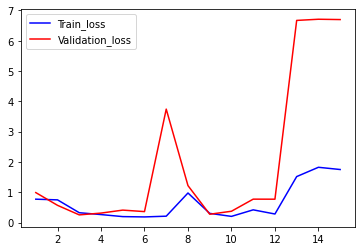

In [36]:
epo=[i for i in range(1,16)]
plt.plot(epo,TL,'b-',label='Train_loss')
plt.plot(epo,VL,'r-',label='Validation_loss')
plt.legend()

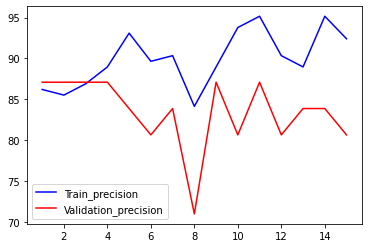

In [37]:
# plot the accuracy
epo=[i for i in range(1,16)]
plt.plot(epo,TP,'b-',label='Train_precision')
plt.plot(epo,VP,'r-',label='Validation_precision')
plt.legend()

We can see that MLP also gives a 75% accuracy on test set which is closed to (but lower than) random forest performance. However it has better on validation set since we use the accuracy as the criteria for early stopping.

In [38]:
# Evaluate our model's performance after training
#--------------------training set of MLP --------------------
model.eval()  # we need to put the model into evaluation mode so that it does not update the gradients
y_pred_proba = best_model(torch.FloatTensor(X_train))
y_pred = predict(y_pred_proba)
after_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_train))

print("The binary cross-entropy loss of our model is {:.4f} on training set.".format(after_train))
print("The model's accuracy score on training set is {:.2f}%".format(accuracy(y_train, y_pred.squeeze())))
#bit better than the logistic regression

#-------validation set of MLP------------
model.eval()  # we need to put the model into evaluation mode so that it does not update the gradients
y_pred_proba = best_model(torch.FloatTensor(X_dev))
y_pred = predict(y_pred_proba)
after_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_dev))

print("The binary cross-entropy loss of our model is {:.4f} on validation set.".format(after_train))
print("The model's accuracy score on validation set is {:.2f}%".format(accuracy(y_dev, y_pred.squeeze())))
#bit better than the logistic regression

#-------------test size of MLP-----------------
model.eval()  # we need to put the model into evaluation mode so that it does not update the gradients
y_pred_proba = best_model(torch.FloatTensor(X_test))
y_pred = predict(y_pred_proba)
after_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_test))

print("The binary cross-entropy loss of our model is {:.4f} on test set.".format(after_train))
print("The model's accuracy score on test set is {:.2f}%".format(accuracy(y_test, y_pred.squeeze())))
#bit better than the logistic regression

MLP(
  (fc1): Linear(in_features=22, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

The binary cross-entropy loss of our model is 1.0188 on training set.
The model's accuracy score on training set is 86.21%


MLP(
  (fc1): Linear(in_features=22, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

The binary cross-entropy loss of our model is 0.9921 on validation set.
The model's accuracy score on validation set is 87.10%


MLP(
  (fc1): Linear(in_features=22, out_features=800, bias=True)
  (fc2): Linear(in_features=800, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

The binary cross-entropy loss of our model is 0.4094 on test set.
The model's accuracy score on test set is 75.00%


## simple neural network on Tensorflow

In [41]:
import tensorflow as tf
feature_cols = [tf.feature_column.numeric_column("X", shape=[22])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[1500,800,400,200], n_classes=2,
                                     feature_columns=feature_cols)

input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=12, batch_size=10, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\asus\\AppData\\Local\\Temp\\tmppo3gtl89', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorfl

In [42]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-03-26T17:06:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\asus\AppData\Local\Temp\tmppo3gtl89\model.ckpt-174
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.89235s
INFO:tensorflow:Finished evaluation at 2021-03-26-17:06:08
INFO:tensorflow:Saving dict for global step 174: accuracy = 0.8125, accuracy_baseline = 0.65625, auc = 0.92857146, auc_precision_recall = 0.89044595, average_loss = 0.58077645, global_step = 174, label/mean = 0.34375, loss = 0.58077645, precision = 0.6923077, prediction/mean = 0.5104731, recall = 0.8181818
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 174: C:\Users\asus\AppData\Local\Temp\tmppo3gtl89\model.ckpt-174


We can see that this neural network is too simple, so it gives us an accuracy of 81% on test set, which implies the best performance. However, after several trials, we found that the performance of these neural networks tend to be insteady, so we will still recommend using the random forest for prediction stability. 

In [43]:
eval_results

{'accuracy': 0.8125,
 'accuracy_baseline': 0.65625,
 'auc': 0.92857146,
 'auc_precision_recall': 0.89044595,
 'average_loss': 0.58077645,
 'label/mean': 0.34375,
 'loss': 0.58077645,
 'precision': 0.6923077,
 'prediction/mean': 0.5104731,
 'recall': 0.8181818,
 'global_step': 174}


## 5. Present Results

### Confusion Matrix

To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve. 


A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm. 

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). 

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

<div class="alert alert-warning">
<b>ACTION:  Confusion matrix  </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain confusion matrix results, calculate accuracy and precision etc. </p>

</div>

In [31]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar(fraction=0.046, pad=0.04)

    # Add the labels
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    ax.set(yticks=[0, 1], 
           xticks=[0, 1], 
           yticklabels=classes, 
           xticklabels=classes)
    #ax.yaxis.set_major_locator(matplotlib.ticker.IndexLocator(base=1, offset=0.5))
    if title:
        plt.title(title)
    plt.ylabel('Ground truth label')
    plt.xlabel('Predicted label')
    plt.show()

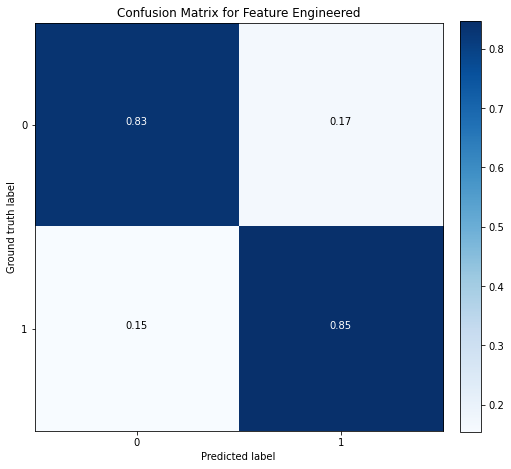

In [35]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred_1=rf.predict(X_val)
cm = confusion_matrix( y_val,y_pred_1)#注意这里左边是true label 右边是prediction！！
plot_confusion_matrix(cm, ('0', '1'), normalize=True,title='Confusion Matrix for Feature Engineered')

### ROC Curve 

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold. 

The AUC summarizes the results of an ROC – it is the probability that a randomly chosen ‘success’ example has a higher probability of being a success than a randomly chosen ‘failure’ example. A random classification would yield an AUC of 0.5, and a perfectly accurate one would yield 1.


<div class="alert alert-warning">
<b>ACTION:  ROC Curve </b> 

<p> Comment on the performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the ROC results. </p>

</div>

In [67]:
# ------------------ call all the tuned models to be tried -----------------------
log_clf_tuned =  LogisticRegression(**lg.best_params_)
rf_tuned = RandomForestClassifier(**rf.best_params_)
svc_tuned=sklearn.svm.SVC(**svm.best_params_, probability=True)
gbc_tuned=GradientBoostingClassifier(**gbc.best_params_)


# --------------------- create list of models for iteration -----------------------
clf_list=[log_clf_tuned, rf_tuned, svc_tuned, gbc_tuned, ]
# a list of name is created for visualisation
clf_name=['Logistic', 'Random Forest', 'SVM', 'GBC']

scores=[] # create an empty list for iteration and visualisation
for index in range(len(clf_list)):
    clf_list[index].fit(X_train,y_train)
    y_probas = cross_val_predict(clf_list[index], X_train, y_train, cv=5, method="predict_proba")
    y_scores = y_probas[:, 1]
    scores.append(y_scores)

fpr_value = []
tpr_value = []
for index in range(len(scores)):
    fpr, tpr, thresholds_forest = roc_curve(y_train,scores[index])
    fpr_value.append(fpr)
    tpr_value.append(tpr)


LogisticRegression(C=0.1)

RandomForestClassifier(n_estimators=400)

SVC(C=1, probability=True)

GradientBoostingClassifier(learning_rate=0.25, max_depth=5, n_estimators=250)

In [68]:
def plot_roc_curve(fpr, tpr,label):
    
    for index, color in enumerate(['tab:blue',  'tab:green', 'tab:brown', 'tab:olive'], start=0):
        plt.plot(fpr_value[index], tpr_value[index], color=color,label= label[index])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

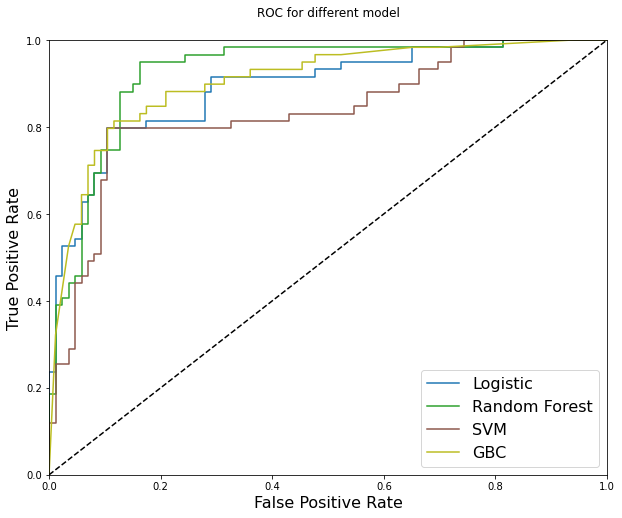

In [45]:
label = ['Logistic', 'Random Forest', 'SVM', 'GBC']
# ------------------- plot the ROC --------------------------------
_=plt.figure(figsize=(10, 8))
_= plt.title('ROC for different model',fontsize=12,y=1.04)
_= plot_roc_curve(fpr_value, tpr_value, label)
_= plt.legend(loc="lower right", fontsize=16)
_=plt.show()

Now that you have a validated model, we can potentially analyze the features of the model, to understand which ones have had the most impact on predicting an artist’s success. 

To do this, we can plot the feature importance as determined by the classifier:

<div class="alert alert-warning">
<b>ACTION:  Feature importance</b> 

<p> Where possible, comment on the feature selection and performance of your final algorithm. Repeat analysis from earlier in the Notebook if necessary. </p>

<p> Explain any observations about the sensitivity of your final analysis. </p>

</div>

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 22 artists>

([<matplotlib.axis.YTick at 0x1f1d78e3bb0>,
 [Text(0, 0, 'region_2'),
  Text(0, 1, 'region_9'),
  Text(0, 2, 'Adult'),
  Text(0, 3, 'gender'),
  Text(0, 4, 'region_10'),
  Text(0, 5, 'mobile_perc'),
  Text(0, 6, 'region_3'),
  Text(0, 7, 'region_1'),
  Text(0, 8, 'passion'),
  Text(0, 9, 'region_7'),
  Text(0, 10, 'YoungAdult'),
  Text(0, 11, 'region_8'),
  Text(0, 12, 'region_4'),
  Text(0, 13, 'region_5'),
  Text(0, 14, 'region_6'),
  Text(0, 15, 'playlist_passion'),
  Text(0, 16, 'playlist_user'),
  Text(0, 17, 'Dependent'),
  Text(0, 18, 'playlist_stream'),
  Text(0, 19, 'playlist_stream_len'),
  Text(0, 20, 'playlist_num'),
  Text(0, 21, 'count')])

Text(0.5, 0, 'Relative Importance')

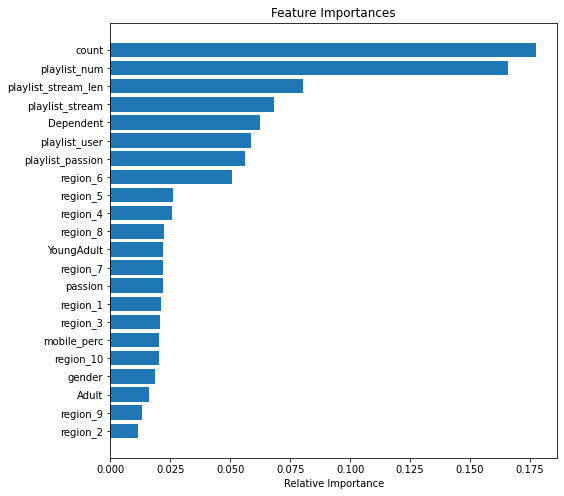

In [69]:
# Select features.
df =df_model.drop(['success'], axis =1)
feat_importances = pd.Series(rf_tuned.feature_importances_, index=df.columns)
feat_importances=feat_importances.sort_values()
# Plot the feature importance of RandomForest Model 
plt.figure(figsize= (8,8))
plt.title('Feature Importances')
plt.barh(range(len(feat_importances)), feat_importances, color='tab:blue',align='center')
plt.yticks(range(len(feat_importances)), feat_importances.index)
plt.xlabel('Relative Importance')

## Summary 

Based on the selected models and analysis, the best model to evaluate the success of artists is random forest model with the accuracy of 87% compared to other classifiers. This may help Spotify construct revenue predictions for future use. For example, assume that we use the current model to predict whether another group of artists with a total of 10 million streams on Spotify will be successful. Given the fact that each stream values £0.0112, we can predict that they will generate a potential revenue of around £97,440 in total. 

  

To explore our models in more details, the most important features that affect the models are PCA components of region, stream counts, and the number of playlists respectively. Furthermore, PCA components can help us understand the variations of user behaviours, which can be utilized by Spotify to capture the business value of the data and to adopt corresponding content distribution and recommendation strategies. 

  

There are some limitations associated with our analysis. We may have sampling bias and need more investigations to tackle the problem. In addition, we lack some understanding of the PCA components currently about why these regions have more impacts on success and what is the intuition behind. Therefore, for further research, we can use clustering models to study the actual meanings of each components and extract business values to improve our analysis. 


